### PlayStation 5 Games Dataset Analysis

#### Import required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

#### Import dataset

In [9]:
df = pd.read_csv('ps5.csv', encoding='UTF-8-SIG')

#### Data Cleaning

In [10]:
df.shape

(2001, 9)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   url                           2001 non-null   object 
 1   id                            2001 non-null   object 
 2   publisherName                 2000 non-null   object 
 3   releaseDate                   2001 non-null   object 
 4   name                          2001 non-null   object 
 5   isAgeRestricted               2001 non-null   bool   
 6   activeCtaId                   2001 non-null   object 
 7   starRating/averageRating      2001 non-null   float64
 8   starRating/totalRatingsCount  2001 non-null   int64  
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 127.1+ KB


In [12]:
print("First few rows of the dataframe:")
df.head()

First few rows of the dataframe:


,url,id,publisherName,releaseDate,name,isAgeRestricted,activeCtaId,starRating/averageRating,starRating/totalRatingsCount
0,https://store.playstation.com/en-us/product/UP...,UP0101-PPSA19225_00-0159266583099383,"Konami Digital Entertainment, Inc.",2024-03-28T04:00:00Z,Felix the Cat,False,PREORDER:BUY_NOW:UP0101-PPSA19225_00-015926658...,5.00,1
1,https://store.playstation.com/en-us/product/UP...,UP2565-PPSA04379_00-0242096879154610,astragon Entertainment GmbH,2024-04-04T15:00:00Z,Construction Simulator - Gold Edition,False,PREORDER:BUY_NOW:UP2565-PPSA04379_00-024209687...,3.55,1526
2,https://store.playstation.com/en-us/product/UP...,UP4040-PPSA04721_00-HUNDREDHEROESDLX,505 Games,2024-04-21T13:00:00Z,Eiyuden Chronicle: Hundred Heroes - Digital De...,False,PREORDER:BUY_NOW:UP4040-PPSA04721_00-HUNDREDHE...,4.79,29
3,https://store.playstation.com/en-us/product/UP...,UP4040-PPSA04721_00-EIYUDENHEROESPS5,505 Games,2024-04-23T13:00:00Z,Eiyuden Chronicle: Hundred Heroes,False,PREORDER:BUY_NOW:UP4040-PPSA04721_00-EIYUDENHE...,4.79,29
4,https://store.playstation.com/en-us/product/UP...,UP9000-PPSA13196_00-STELLARBLADEDDE0,Sony Interactive Entertainment,2024-04-26T04:00:00Z,Stellar Blade™ Digital Deluxe Edition,False,PREORDER:BUY_NOW:UP9000-PPSA13196_00-STELLARBL...,0.00,0


In [23]:
# Checking for missing values
df.isnull().sum()

url                             0
id                              0
publisherName                   0
releaseDate                     0
name                            0
isAgeRestricted                 0
activeCtaId                     0
starRating/averageRating        0
starRating/totalRatingsCount    0
dtype: int64

In [24]:
# Removing null values
df.dropna(subset=['publisherName'], inplace=True)

In [15]:
df.isnull().sum()

url                             0
id                              0
publisherName                   0
releaseDate                     0
name                            0
isAgeRestricted                 0
activeCtaId                     0
starRating/averageRating        0
starRating/totalRatingsCount    0
dtype: int64

In [16]:
print(df.duplicated().sum())

0


In [25]:
# Chaning date format
df['releaseDate'] = pd.to_datetime(df['releaseDate'], errors='coerce')

In [18]:
df['releaseDate'].head()

0   2024-03-28 04:00:00+00:00
1   2024-04-04 15:00:00+00:00
2   2024-04-21 13:00:00+00:00
3   2024-04-23 13:00:00+00:00
4   2024-04-26 04:00:00+00:00
Name: releaseDate, dtype: datetime64[ns, UTC]

#### Exploratory Data Analysis

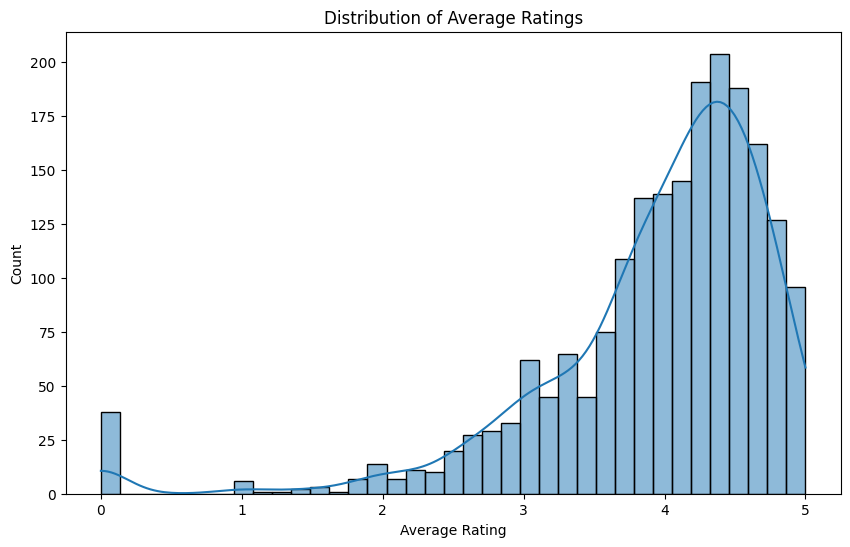

In [19]:
# Distribution of average ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['starRating/averageRating'], kde=True)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.show()

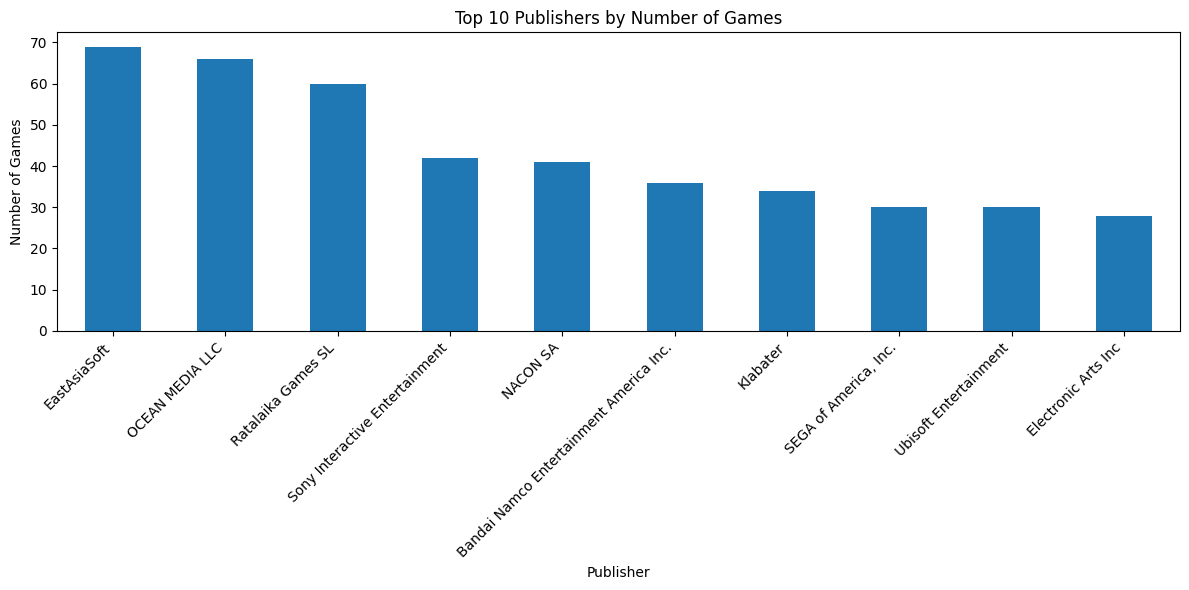

In [37]:
# Top 10 publishers by number of games
top_publishers = df['publisherName'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_publishers.plot(kind='bar')
plt.title('Top 10 Publishers by Number of Games')
plt.xlabel('Publisher')
plt.ylabel('Number of Games')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

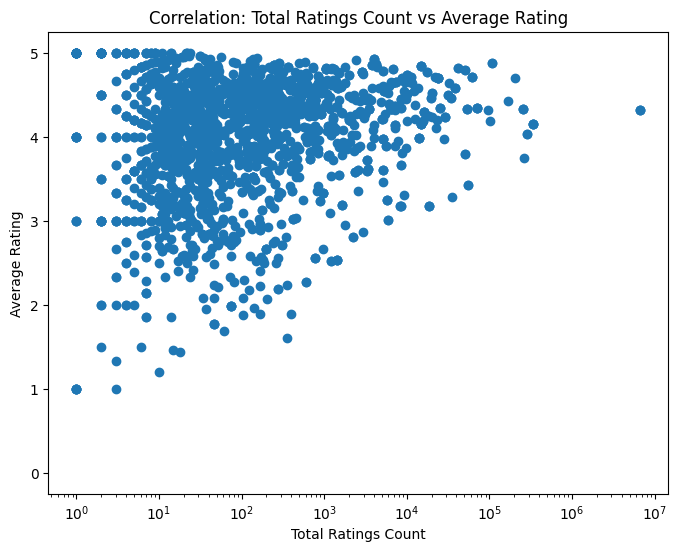

In [20]:
# Correlation between average rating and total ratings count
plt.figure(figsize=(8, 6))
plt.scatter(df['starRating/totalRatingsCount'], df['starRating/averageRating'])
plt.title('Correlation: Total Ratings Count vs Average Rating')
plt.xlabel('Total Ratings Count')
plt.ylabel('Average Rating')
plt.xscale('log')  # Using log scale for better visualization
plt.show()

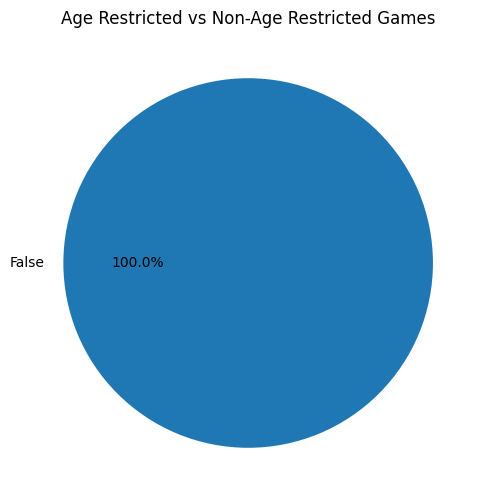

In [21]:
# Age restriction analysis
age_restricted = df['isAgeRestricted'].value_counts()
plt.figure(figsize=(8, 6))
age_restricted.plot(kind='pie', autopct='%1.1f%%')
plt.title('Age Restricted vs Non-Age Restricted Games')
plt.ylabel('')
plt.show()

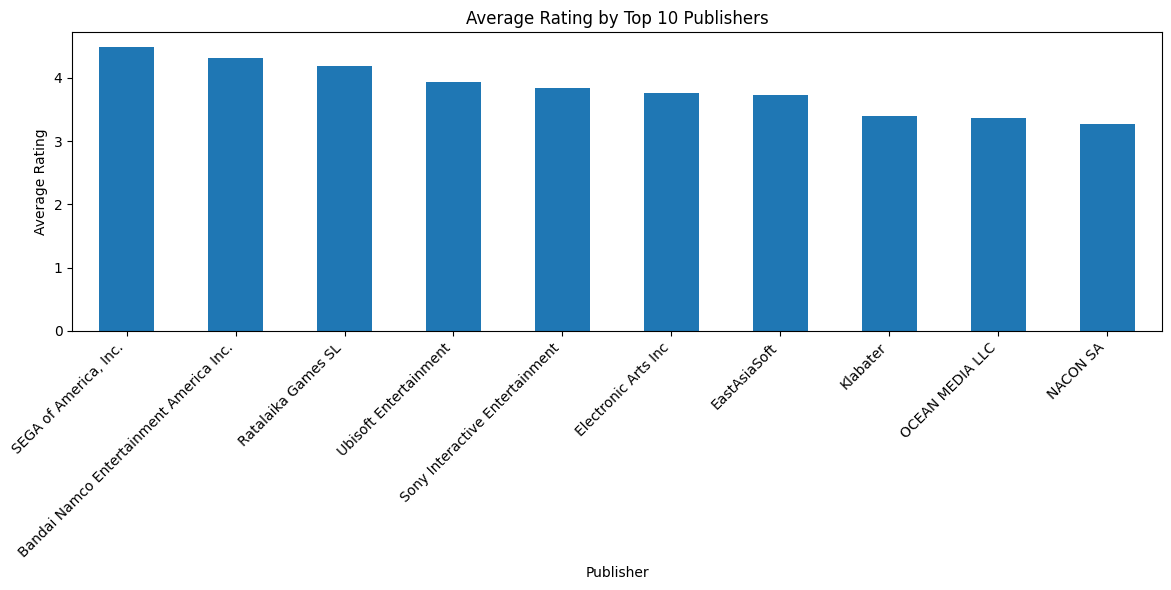

In [22]:
# Average rating by publisher (for top 10 publishers)
top_10_publishers = df['publisherName'].value_counts().nlargest(10).index
avg_rating_by_publisher = df[df['publisherName'].isin(top_10_publishers)].groupby('publisherName')['starRating/averageRating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
avg_rating_by_publisher.plot(kind='bar')
plt.title('Average Rating by Top 10 Publishers')
plt.xlabel('Publisher')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()